In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.i
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

606

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2d32bc8af73d788ac9539ef6ef5f58f"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2d32bc8af73d788ac9539ef6ef5f58f


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | carberry
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | high level
Processing Record 8 of Set 1 | auki
Processing Record 9 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 10 of Set 1 | gandorhun
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | rolandia
Processing Record 14 of Set 1 | coos bay
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | omboue
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | saint-francois
Processing Record 22 of Set 1 | jiwani
Processing Reco

Processing Record 35 of Set 4 | pangnirtung
Processing Record 36 of Set 4 | shenjiamen
Processing Record 37 of Set 4 | lazaro cardenas
Processing Record 38 of Set 4 | north platte
Processing Record 39 of Set 4 | belmonte
Processing Record 40 of Set 4 | verkhnetulomskiy
Processing Record 41 of Set 4 | pahrump
Processing Record 42 of Set 4 | seoul
Processing Record 43 of Set 4 | freeport
Processing Record 44 of Set 4 | panaba
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | tubruq
City not found. Skipping...
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | kelc
Processing Record 50 of Set 4 | bara
Processing Record 1 of Set 5 | paragominas
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | worland
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | norman wells
Processing Record 8 

Processing Record 28 of Set 8 | ballina
Processing Record 29 of Set 8 | havre-saint-pierre
Processing Record 30 of Set 8 | cherskiy
Processing Record 31 of Set 8 | tete
Processing Record 32 of Set 8 | peruibe
Processing Record 33 of Set 8 | nhulunbuy
Processing Record 34 of Set 8 | nam tha
City not found. Skipping...
Processing Record 35 of Set 8 | atherton
Processing Record 36 of Set 8 | port elizabeth
Processing Record 37 of Set 8 | carauari
Processing Record 38 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 39 of Set 8 | kodiak
Processing Record 40 of Set 8 | kichmengskiy gorodok
Processing Record 41 of Set 8 | ponta delgada
Processing Record 42 of Set 8 | rabaul
Processing Record 43 of Set 8 | san policarpo
Processing Record 44 of Set 8 | zhanjiang
Processing Record 45 of Set 8 | uwayl
City not found. Skipping...
Processing Record 46 of Set 8 | mayahi
Processing Record 47 of Set 8 | murray bridge
Processing Record 48 of Set 8 | heinola
Processing Record 49 of 

City not found. Skipping...
Processing Record 17 of Set 12 | coquimbo
Processing Record 18 of Set 12 | maceio
Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | srednekolymsk
Processing Record 21 of Set 12 | finnsnes
Processing Record 22 of Set 12 | alta floresta
Processing Record 23 of Set 12 | healesville
Processing Record 24 of Set 12 | gao
Processing Record 25 of Set 12 | darasun
Processing Record 26 of Set 12 | kosonsoy
Processing Record 27 of Set 12 | independence
Processing Record 28 of Set 12 | balao
Processing Record 29 of Set 12 | shingu
Processing Record 30 of Set 12 | garowe
Processing Record 31 of Set 12 | solnechnyy
Processing Record 32 of Set 12 | puerto carreno
Processing Record 33 of Set 12 | lompoc
Processing Record 34 of Set 12 | paucartambo
City not found. Skipping...
Processing Record 35 of Set 12 | lebanon
Processing Record 36 of Set 12 | kumluca
Processing Record 37 of Set 12 | hauterive
Processing Record 38 of Set 12 | pyaozerskiy
Proc

In [10]:
len(city_data)

557

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.40,73,90,20.71,US,2021-04-03 07:15:15
1,Carberry,49.8689,-99.3602,35.60,51,1,9.22,CA,2021-04-03 07:15:15
2,Guerrero Negro,27.9769,-114.0611,58.59,89,0,11.50,MX,2021-04-03 07:15:15
3,Hilo,19.7297,-155.0900,73.40,68,75,3.44,US,2021-04-03 07:15:15
4,Atuona,-9.8000,-139.0333,80.28,82,82,14.90,PF,2021-04-03 07:15:15
5,Tuktoyaktuk,69.4541,-133.0374,-5.26,92,100,5.30,CA,2021-04-03 07:15:15
6,High Level,58.5169,-117.1360,15.80,92,1,2.30,CA,2021-04-03 07:15:15
7,Auki,-8.7676,160.7034,82.60,75,88,2.01,SB,2021-04-03 07:15:15
8,Gandorhun,7.5000,-11.8333,75.96,93,6,2.71,SL,2021-04-03 07:15:16
9,Rikitea,-23.1203,-134.9692,78.22,69,31,9.31,PF,2021-04-03 07:15:16


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

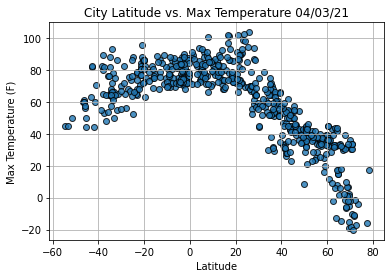

In [14]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

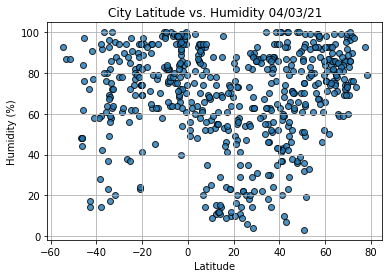

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

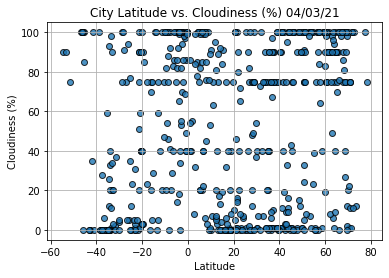

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


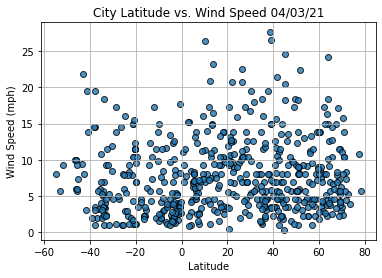

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label,text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

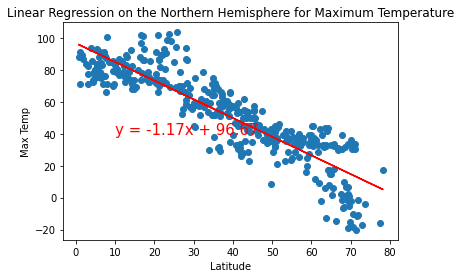

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

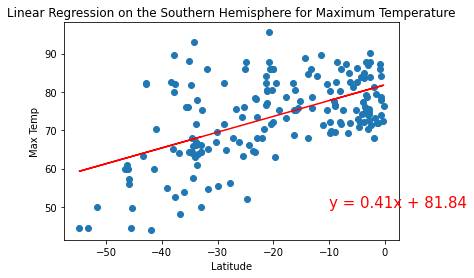

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-10,50))

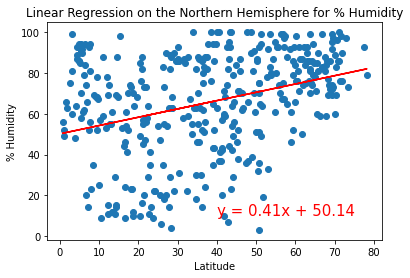

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))


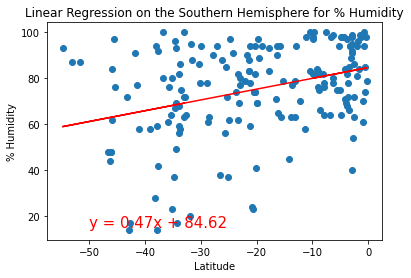

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


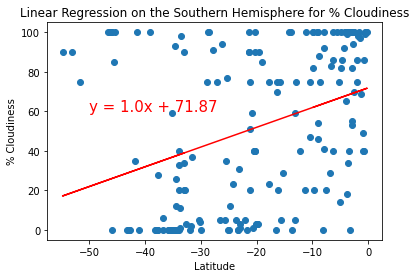

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

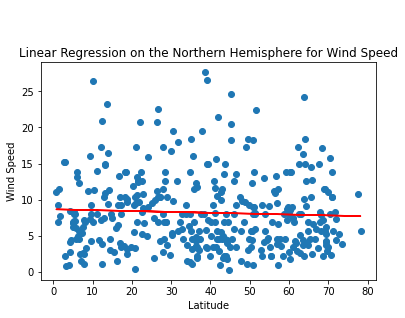

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

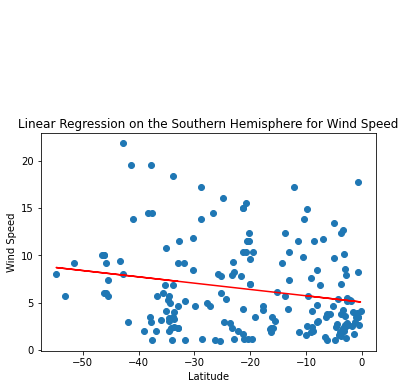

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed',(-50,35))